In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv(r'C:\Users\garga\Downloads\feat_25_.csv',header=None)
labels=df.iloc[:,25]
df_=df.iloc[:,:25]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_, labels, test_size=0.2, random_state = 2)


In [24]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)


### Simple logistic model. No hidden layer

In [25]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(25,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
75/75 [==============================] - 0s 1ms/step - loss: 2.7847 - accuracy: 0.1146
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 2.4208 - accuracy: 0.1883
Epoch 3/100
75/75 [==============================] - 0s 972us/step - loss: 2.1087 - accuracy: 0.2821
Epoch 4/100
75/75 [==============================] - 0s 1ms/step - loss: 1.8449 - accuracy: 0.3767
Epoch 5/100
75/75 [==============================] - 0s 1ms/step - loss: 1.6261 - accuracy: 0.4858
Epoch 6/100
75/75 [==============================] - 0s 1ms/step - loss: 1.4474 - accuracy: 0.5783
Epoch 7/100
75/75 [==============================] - 0s 1ms/step - loss: 1.3023 - accuracy: 0.6367
Epoch 8/100
75/75 [==============================] - 0s 1ms/step - loss: 1.1854 - accuracy: 0.6837
Epoch 9/100
75/75 [==============================] - 0s 1ms/step - loss: 1.0907 - accuracy: 0.7196
Epoch 10/100
75/75 [==============================] - 0s 1ms/step - loss: 1.0138 - accuracy: 0.7429
Epoch 1

In [26]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.8500


[0.4995981454849243, 0.8500000238418579]

In [27]:
y_predicted=model.predict(X_test)

19/19 [==============================] - 0s 843us/step


In [28]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Text(69.0, 0.5, 'Truth')

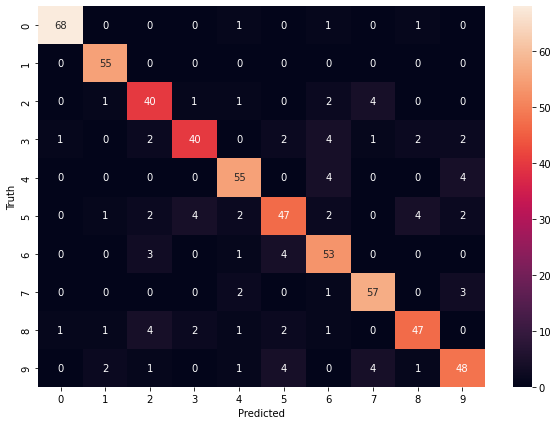

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Model with added one hidden layer to see if accuracy improves or not

In [30]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(25,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train, y_train, epochs=50)

Epoch 1/50
75/75 [==============================] - 0s 1ms/step - loss: 2.0154 - accuracy: 0.3562
Epoch 2/50
75/75 [==============================] - 0s 1ms/step - loss: 1.2125 - accuracy: 0.7708
Epoch 3/50
75/75 [==============================] - 0s 1ms/step - loss: 0.7881 - accuracy: 0.8358
Epoch 4/50
75/75 [==============================] - 0s 1ms/step - loss: 0.5929 - accuracy: 0.8554
Epoch 5/50
75/75 [==============================] - 0s 1ms/step - loss: 0.4890 - accuracy: 0.8729
Epoch 6/50
75/75 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.8929
Epoch 7/50
75/75 [==============================] - 0s 1ms/step - loss: 0.3813 - accuracy: 0.9042
Epoch 8/50
75/75 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.9100
Epoch 9/50
75/75 [==============================] - 0s 1ms/step - loss: 0.3193 - accuracy: 0.9142
Epoch 10/50
75/75 [==============================] - 0s 1ms/step - loss: 0.2962 - accuracy: 0.9225
Epoch 11/50
75/75 [

In [31]:
model2.evaluate(X_test,y_test)

19/19 [==============================] - 0s 2ms/step - loss: 0.2765 - accuracy: 0.9167


[0.2764602303504944, 0.9166666865348816]

19/19 [==============================] - 0s 2ms/step


Text(69.0, 0.5, 'Truth')

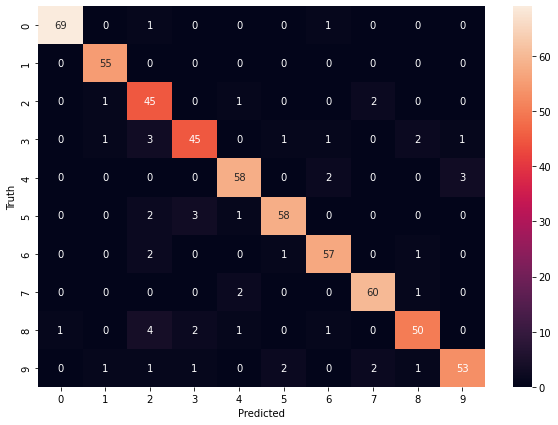

In [32]:
y_predicted = model2.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### point 2 and 3 are more tend to misclassify.
#### Adding one hidden layer makes the model to learn the data better and hence accuracy increases from 85% to 91%.
#### Further accuracy can be increased by optimizing number of hyperparameters such as number of neurons, number of hidden layers, epoch number, etc.
#### However, if we increase number of hidden layers too much, there might be chances for model to be overfit.